In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

insurance_df = pd.read_csv("../Data/insurance.csv")

In [9]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='age', ylabel='charges'>

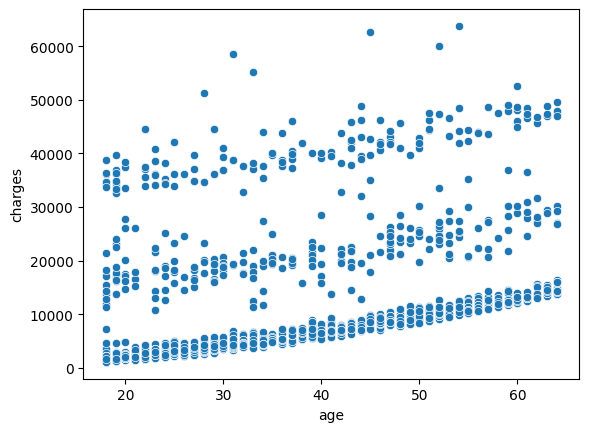

In [11]:
sns.scatterplot(insurance_df, x="age", y="charges")

In [12]:
features = ["age"]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           4.89e-29
Time:                        11:41:14   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

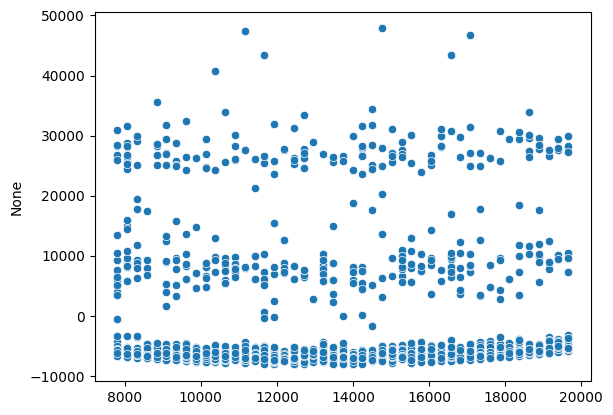

In [13]:
sns.scatterplot(x=model.predict(), y=model.resid)


In [14]:
# (R_ssqured increase but Adj. R-squared does not increase) So that might be a good indication that our squared term isn't super useful, 
# P values also become insignificant. that meas trying that age_squred term is not that useful  

insurance_df = insurance_df.assign(age_sq = insurance_df["age"] ** 2)

features = ["age", "age_sq"]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     66.50
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           2.96e-28
Time:                        11:41:15   Log-Likelihood:                -14414.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6508.5527   2699.359      2.411      0.016    1213.105    1.18e+04
age           64.5731    148.001      0.436      0.663    -225.766     354.912
age_sq         2.4389      1.847      1.320      0.187      -1.185       6.062
==============================================================================
Omnibus:                      401.205   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.169
Skew:                           1.736   Prob(JB):                    6.73e-190
Kurtosis:                       4.888   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

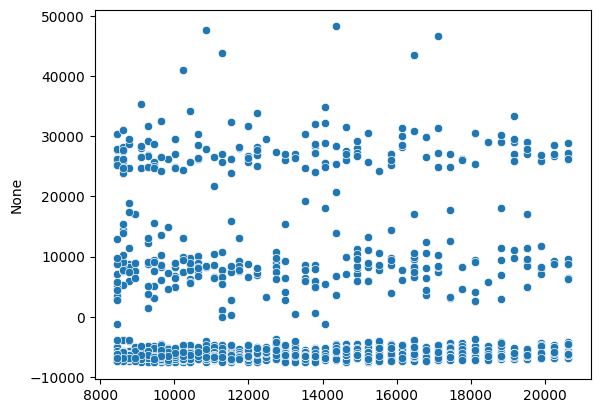

In [15]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [16]:
features = ["age", "bmi", "children"]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           8.80e-37
Time:                        11:41:17   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  This is we would approach a curvilinear relationship in our data if we see that in EDA or in our residual plots

<Axes: >

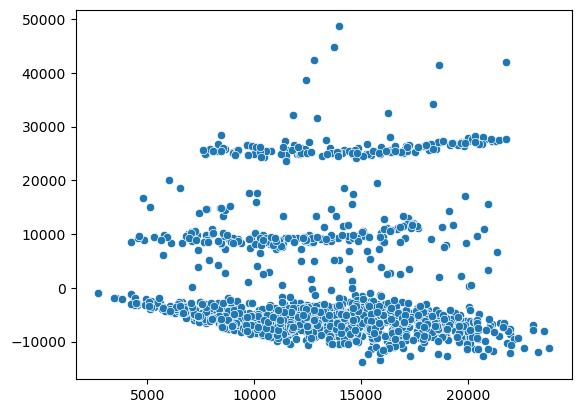

In [6]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [16]:
!git add 04_Assumptions_Demos.ipynb
!git commit -m "04_Assumptions_Demos-1"
!git push origin master


[master bc7db95] 04_Assumptions_Demos-1
 1 file changed, 1843 insertions(+)
 create mode 100644 DataScienceinPythonRegression-230823-154628/Course Materials/Demo Notebooks/04_Assumptions_Demos.ipynb
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 590.86 KiB | 5.91 MiB/s, done.
Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:Proftg/Maven-regression.git
   638c651..bc7db95  master -> master


## QQ Plot

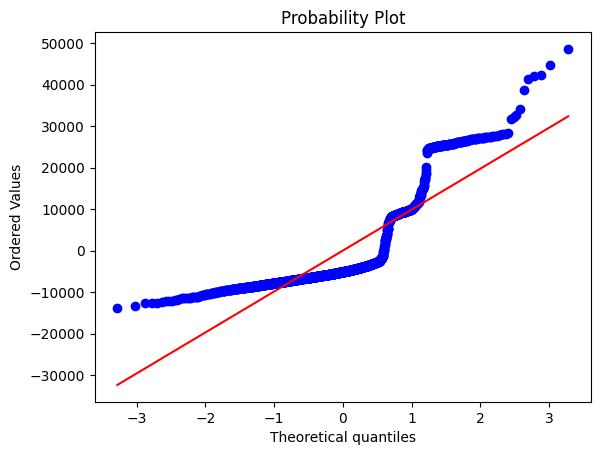

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist="norm", plot=plt);

## Log Transform

In [21]:
features = ["age", "bmi", "children"]

X = sm.add_constant(insurance_df[features])
y = np.log(insurance_df["charges"])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          2.82e-104
Time:                        11:43:44   Log-Likelihood:                -1543.9
No. Observations:                1338   AIC:                             3096.
Df Residuals:                    1334   BIC:                             3117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3189      0.119     61.643      0.000       7.086       7.552
age            0.0336      0.002     22.331      0.000       0.031       0.037
bmi            0.0113      0.003      3.252      0.001       0.004       0.018
children       0.1057      0.017      6.058      0.000       0.071       0.140
==============================================================================
Omnibus:                      193.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.149
Skew:                           1.125   Prob(JB):                     1.20e-62
Kurtosis:                       3.219   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

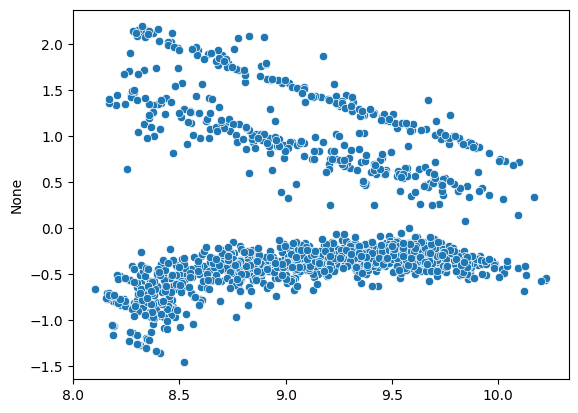

In [22]:
sns.scatterplot(x=model.predict(), y=model.resid);

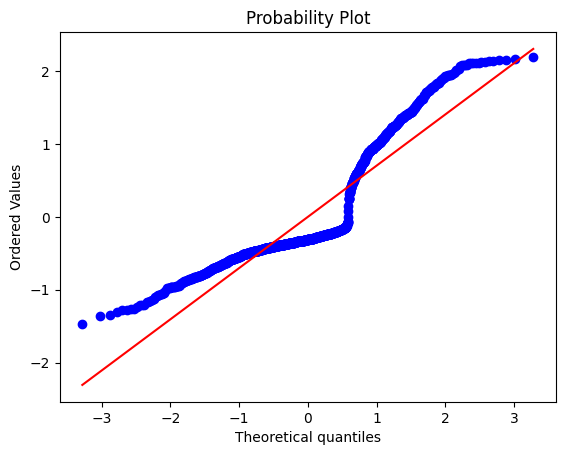

In [23]:
stats.probplot(model.resid, dist="norm", plot=plt);

In [24]:
# Residual Plot Helper Functions

def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")   

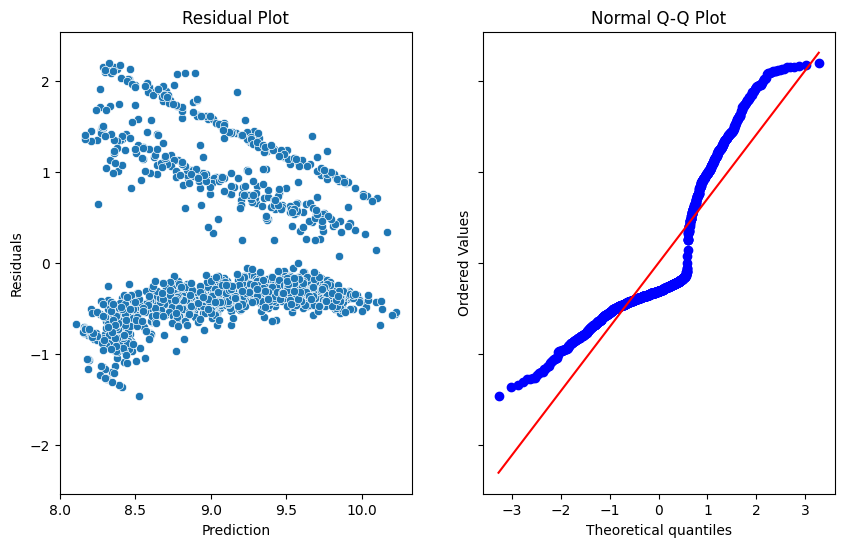

In [24]:
residual_analysis_plots(model)

In [25]:
insurance_df = insurance_df.assign(
    smoker_flag=np.where(insurance_df["smoker"] == "yes", 1, 0),
    female_flag=np.where(insurance_df["sex"] == "female", 1, 0),
    bmi_smoker_int = lambda x: x["bmi"] * x["smoker_flag"],
#     age_bmi_int = insurance_df["bmi"] * insurance_df["age"],
#     smoker_sex_int = insurance_df["smoker_flag"] * insurance_df["female_flag"]
#     age_smoker_int = insurance_df["age"] * insurance_df["smoker_flag"],
    age_sq = insurance_df["age"] ** 2,
)#.query("charges < 20000")



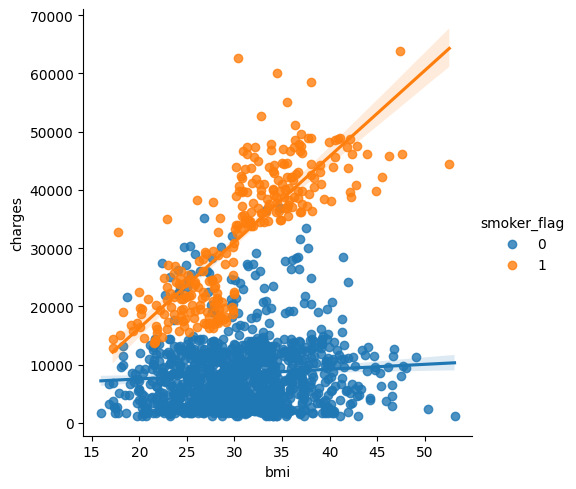

In [26]:
sns.lmplot(insurance_df, x="bmi", y="charges", hue="smoker_flag")

In [26]:
# Introduces Perfect Multicollinearity

insurance_df["age2x"] = insurance_df["age"] * 2

### Attempts to fix normality issues - feature engineering & Target Transforms

In [34]:
features = [
    "age", 
    # "age2x"
    "age_sq",
    "bmi", 
    "children", 
    "smoker_flag", 
#     "female_flag", 
    "bmi_smoker_int", 
#     "age_bmi_int",
#     "smoker_sex_int"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]
# y = np.sqrt(insurance_df["charges"])
# y = np.log(insurance_df["charges"])
# y = np.log10(insurance_df["charges"])
# y = 1/(insurance_df["charges"])

#box-cox

from scipy.stats import boxcox

# y, fitted_lambda = boxcox(insurance_df["charges"])

# sns.histplot(y).set(xlabel="box_cox_price", title="Box-Cox Transformation")

# sns.despine()

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:56:12   Log-Likelihood:                -13246.
No. Observations:                1338   AIC:                         2.651e+04
Df Residuals:                    1331   BIC:                         2.654e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2343.6991   1372.084      1.708      0.088    -347.983    5035.381
age              -32.2109     64.921     -0.496      0.620    -159.570      95.148
age_sq             3.7471      0.810      4.627      0.000       2.158       5.336
bmi                2.4936     24.694      0.101      0.920     -45.950      50.937
children         667.5636    115.007      5.805      0.000     441.949     893.178
smoker_flag    -2.012e+04   1642.054    -12.253      0.000   -2.33e+04   -1.69e+04
bmi_smoker_int  1431.6963     52.424     27.310      0.000    1328.853    1534.540
==============================================================================
Omnibus:                      732.227   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4630.947
Skew:                           2.567   Prob(JB):                         0.00
Kurtosis:                      10.531   Cond. No.                     2.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
!git add 04_Assumptions_Demos.ipynb
!git commit -m "04_Assumptions_Demos-QQ plot"
!git push origin master


[master 4c12600] 04_Assumptions_Demos-QQ plot
 1 file changed, 169 insertions(+), 107 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 39.66 KiB | 2.83 MiB/s, done.
Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:Proftg/Maven-regression.git
   5bb8bda..4c12600  master -> master


### Multicollinearity & VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

const             107.805592
age                47.608100
age_sq             47.563585
bmi                 1.297591
children            1.099845
smoker_flag        25.144043
bmi_smoker_int     25.450244
dtype: float64

### Target Transformation Distributions

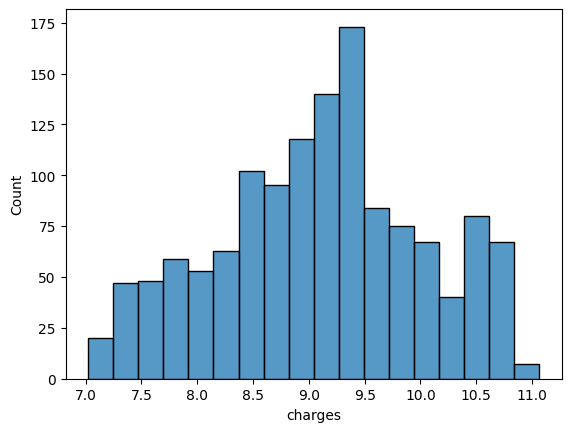

In [30]:
# y = insurance_df["charges"]
# y = np.sqrt(insurance_df["charges"])
y = np.log(insurance_df["charges"])
# y = np.log10(insurance_df["charges"])
# y = 1/(insurance_df["charges"])

sns.histplot(y);

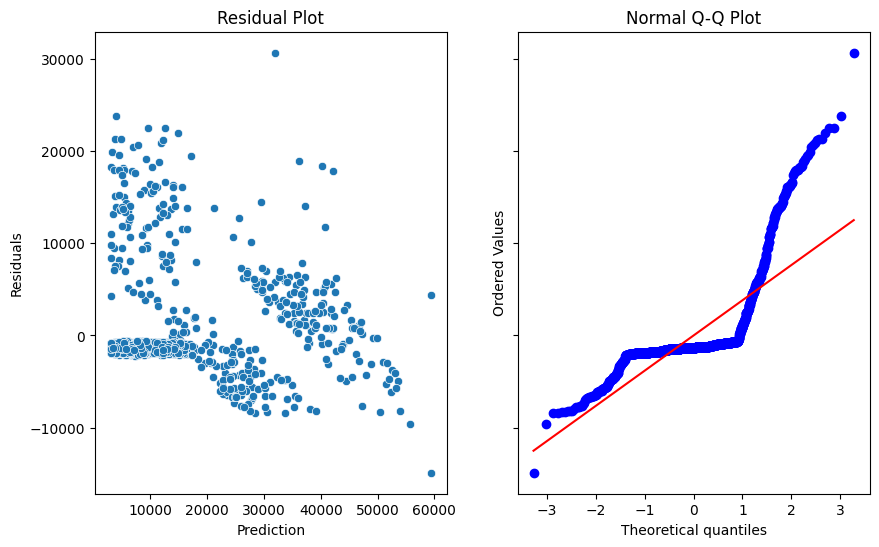

In [33]:
residual_analysis_plots(model)

In [31]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, model.predict())
# mae(np.exp(y), np.exp(model.predict()))

13261.323606409063

In [32]:
features = [
    "age", 
    "bmi", 
    "children", 
]

X = sm.add_constant(insurance_df[features])

y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           8.80e-37
Time:                        11:44:25   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

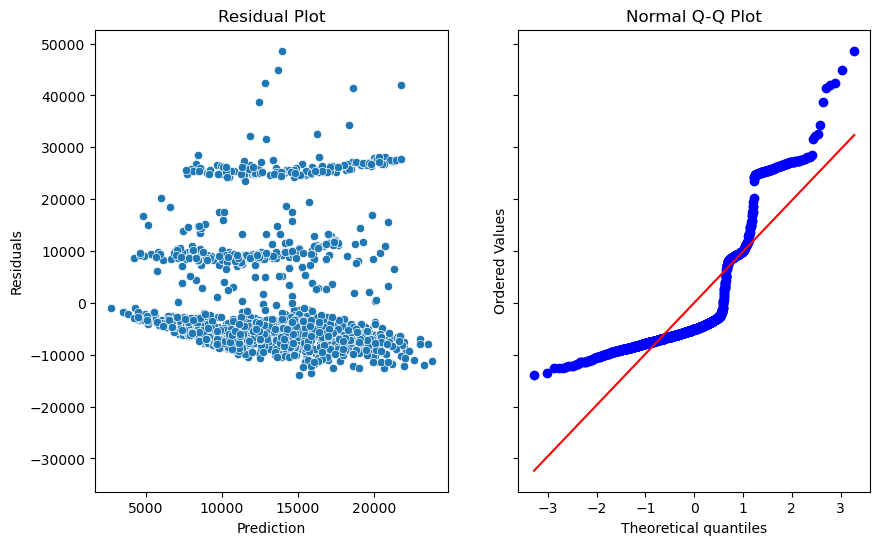

In [25]:
residual_analysis_plots(model)

In [ ]:
!git add 04_Assumptions_Demos.ipynb
!git commit -m "04_Assumptions_Demos-QQ plot"
!git push origin master


### Outliers & Influence

In [26]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_age,dfb_bmi,dfb_children,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.030072,-0.032742,-0.006998,-0.020343,0.000560,0.878503,0.002896,0.047341,0.878427,0.047337
1,-0.006354,0.028187,-0.012165,0.000362,0.000300,-0.654733,0.002796,-0.034669,-0.654593,-0.034661
2,0.000796,0.017443,-0.008812,-0.030880,0.000409,-0.699483,0.003334,-0.040456,-0.699349,-0.040448
3,0.051061,-0.008569,-0.040748,-0.028525,0.000937,1.183479,0.002668,0.061214,1.183657,0.061223
4,-0.011683,0.006981,0.003602,0.013831,0.000128,-0.570894,0.001573,-0.022659,-0.570750,-0.022653


In [27]:
inf_summary_df["cooks_d"].sort_values(ascending=False).round(2)

543     0.03
1047    0.02
1230    0.01
1156    0.01
860     0.01
        ... 
264     0.00
746     0.00
353     0.00
427     0.00
1272    0.00
Name: cooks_d, Length: 1338, dtype: float64